In [27]:
###  Projet Pratiques ou Études de Cas

# Importation des Bibliothèques Nécessaires


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [28]:

# Charger un ensemble de données
df = pd.read_csv('titanic.csv')

# Afficher les premières lignes
df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [29]:
# Informations sur les données
print(df.info())

# Statistiques descriptives
print(df.describe())

# Afficher les valeurs manquantes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

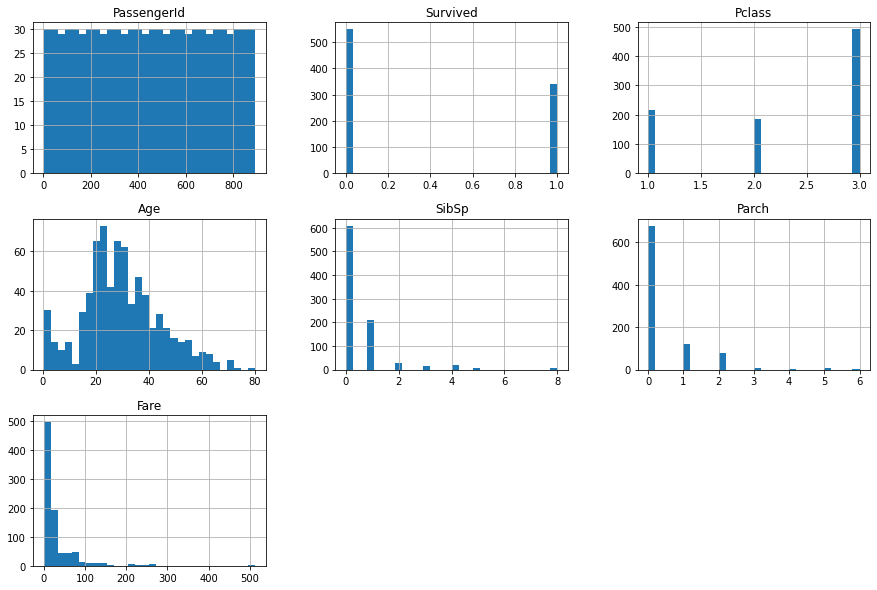

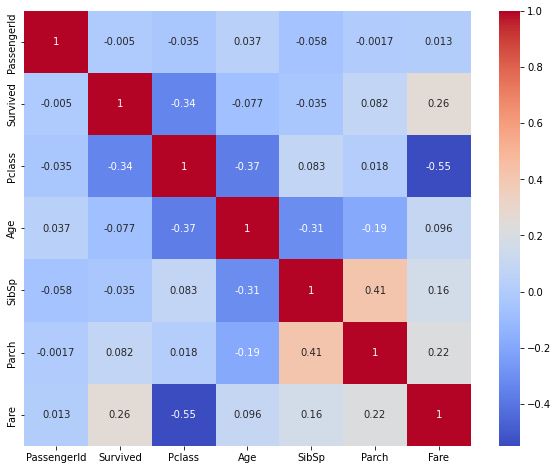

In [30]:
# Histogramme de chaque colonne numérique
df.hist(bins=30, figsize=(15, 10))
plt.show()

# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


<AxesSubplot:ylabel='Survived'>

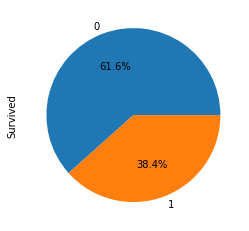

In [85]:
df['Survived'].value_counts().plot(kind="pie",autopct='%1.1f%%')

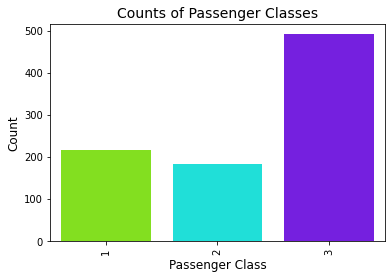

In [86]:
pclass_counts = df['Pclass'].value_counts()
sns.barplot(x=pclass_counts.index, y=pclass_counts.values, palette=sns.color_palette("hsv", len(pclass_counts)))

plt.xlabel("Passenger Class", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Counts of Passenger Classes", fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

<AxesSubplot:ylabel='Sex'>

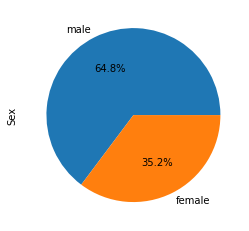

In [87]:
df['Sex'].value_counts().plot(kind="pie",autopct='%1.1f%%')

In [88]:
df[df['Age']<18]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [89]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [90]:
def Classify(x):
    if x < 1:
        return 'Todler'
    elif x < 13:
        return 'Child'
    elif x < 20:
        return 'Teen'
    elif x < 60:
        return 'Adult'
    else:
        return 'Elderly'

In [91]:
df.Age = df.Age.apply(Classify)
df.Age.value_counts().sort_values(ascending=False)

Adult      524
Elderly    203
Teen        95
Child       62
Todler       7
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Count'>

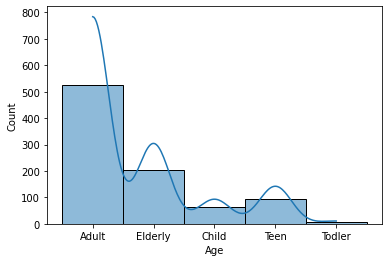

In [92]:
sns.histplot(df['Age'],kde=True)

<AxesSubplot:>

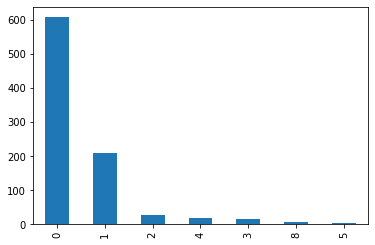

In [93]:
df['SibSp'].value_counts().plot(kind="bar")

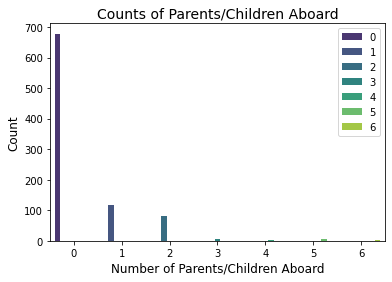

In [94]:
parch_counts = df['Parch'].value_counts()
sns.barplot(x=parch_counts.index, y=parch_counts.values, hue=parch_counts.index, palette=sns.color_palette("viridis", len(parch_counts)))
plt.xlabel("Number of Parents/Children Aboard", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Counts of Parents/Children Aboard", fontsize=14)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<AxesSubplot:xlabel='Survived'>

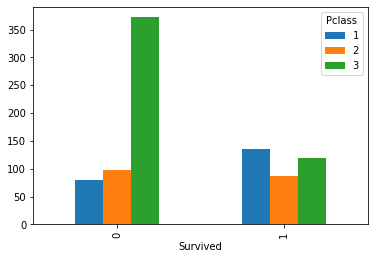

In [95]:
pd.crosstab(df['Survived'],df['Pclass']).plot(kind="bar")

In [96]:
pd.crosstab(df['Survived'],df['Pclass'])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


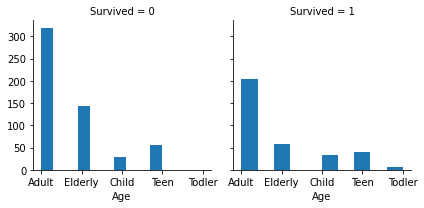

In [97]:
sns.FacetGrid(df, col= 'Survived').map(plt.hist, 'Age')

<AxesSubplot:xlabel='Survived'>

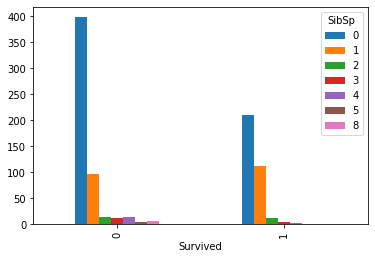

In [98]:
pd.crosstab(df['Survived'],df['SibSp']).plot(kind="bar")

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
# Supprimer les lignes avec des valeurs manquantes
#df.dropna(inplace=True)

# Remplacer les valeurs manquantes
df.fillna(0, inplace=True)

# Encodage des variables catégorielles
df = pd.get_dummies(df, drop_first=True)

# Séparation des caractéristiques et de la variable cible
X = df.drop('Survived', axis=1)
y = df['Survived']


In [33]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,0.0,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Prédire les valeurs
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur Quadratique Moyenne: {mse}")
print(f"Coefficient de Détermination (R²): {r2}")


Erreur Quadratique Moyenne: 0.12780606944649706
Coefficient de Détermination (R²): 0.4729685622734605


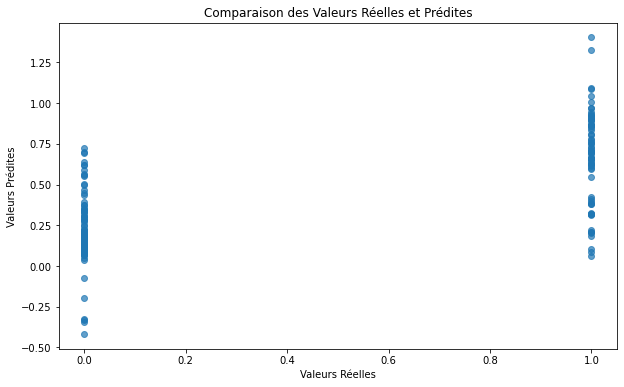

In [37]:
# Comparaison des valeurs réelles et prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison des Valeurs Réelles et Prédites')
plt.show()


In [ ]:
## Résultats differents avec le même modèle

In [52]:
# Charger un ensemble de données
df = pd.read_csv('titanic.csv')

In [110]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,Adult,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,Teen,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Elderly,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,Adult,0,0,111369,30.0000,C148,C


In [73]:
#préparation des données 
def dataprep(data):
    sexe = pd.get_dummies(data['Sex'], prefix='sex')
    cabin = pd.get_dummies(data['Cabin'].fillna('X').str[0], prefix='Cabin')
    # Age
    age = data['Age'].fillna(data['Age'].mean())
    emb = pd.get_dummies(data['Embarked'], prefix='emb')
    # Prix du billet / Attention une donnée de test n'a pas de Prix !
    faresc = pd.DataFrame(MinMaxScaler().fit_transform(data[['Fare']].fillna(0)), columns = ['Prix'])
    # Classe
    pc = pd.DataFrame(MinMaxScaler().fit_transform(data[['Pclass']]), columns = ['Classe'])
    # survived
    sv=df['Survived']
    dp = df[['SibSp']].join(sv).join(pc).join(sexe).join(emb).join(faresc).join(cabin).join(age)
    
    return dp

In [74]:
df1 = dataprep(df)

In [109]:
df1

,SibSp,Survived,Classe,sex_female,sex_male,emb_C,emb_Q,emb_S,Prix,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Age
0,1,0,1.0,0,1,0,0,1,0.014151,0,0,0,0,0,0,0,0,1,22.000000
1,1,1,0.0,1,0,1,0,0,0.139136,0,0,1,0,0,0,0,0,0,38.000000
2,0,1,1.0,1,0,0,0,1,0.015469,0,0,0,0,0,0,0,0,1,26.000000
3,1,1,0.0,1,0,0,0,1,0.103644,0,0,1,0,0,0,0,0,0,35.000000
4,0,0,1.0,0,1,0,0,1,0.015713,0,0,0,0,0,0,0,0,1,35.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0.5,0,1,0,0,1,0.025374,0,0,0,0,0,0,0,0,1,27.000000
887,0,1,0.0,1,0,0,0,1,0.058556,0,1,0,0,0,0,0,0,0,19.000000
888,1,0,1.0,1,0,0,0,1,0.045771,0,0,0,0,0,0,0,0,1,29.699118
889,0,1,0.0,0,1,1,0,0,0.058556,0,0,1,0,0,0,0,0,0,26.000000


In [76]:
# Séparation des caractéristiques et de la variable cible
X = df1.drop('Survived', axis=1)
y = df1['Survived']

# Diviser l'ensemble de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle
model.fit(X_train, y_train)


LinearRegression()

In [84]:
# Prédire les valeurs
y_pred = model.predict(X_test)

# Calculer l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur Quadratique Moyenne: {mse}")
print(f"Coefficient de Détermination (R²): {r2}")


Erreur Quadratique Moyenne: 0.13769658374628174
Coefficient de Détermination (R²): 0.4321832381190973
